## Make Vismap

In [1]:
from sage.visualization.vistool import VisTool
from sage.visualization.utils import save_gif

In [2]:
RUNS = [
    "20210911-2032_resnet_seed43",
    "20210911-2111_resnet_seed44",
    "20210911-2155_resnet",
    "20210911-2228_resnet",
    "20210911-2259_resnet",
    "20210911-2353_resnet",
    "20210912-0018_resnet",
    "20210912-0114_resnet",
    "20210912-0202_resnet",
    "20210912-0307_resnet",
]

PRE_PREFIX = 'G:/My Drive/brain_data/workspace/result/models/'

In [3]:
# PREFIX = 'G:/My Drive/brain_data/workspace/result/models/20210910-1253_resnet256_saveall_seed42'

In [ ]:
for run in RUNS:
    
    PREFIX = PRE_PREFIX + run
    gcam = VisTool(PREFIX=PREFIX, cam_type='gcam')
    gcam(dataloader='test', prefix=PREFIX, visualize=True, save=True)
    for layer_idx in range(9):
        save_gif(PREFIX, layer_idx)

Load '{'encoder': 'G:/My Drive/brain_data/workspace/result/models/20210911-2032_resnet_seed43/encoder\\ep002_mae22.59.pt', 'regressor': 'G:/My Drive/brain_data/workspace/result/models/20210911-2032_resnet_seed43/regressor\\ep002_mae22.59.pt'}'
Weights successfully loaded!
Weights successfully loaded!


In [2]:
gcam = VisTool(PREFIX=PREFIX, cam_type='gcam')

Use cuda:0 as a device.
Output from encoder is 256.
Total Number of parameters: 3634533
TOTAL TRAIN 1161 | VALID 291
MIXED PRECISION:: True


In [4]:
from sage.data.dataloader import get_dataloader

train_dataloader = get_dataloader(gcam.cfg, sampling='train')
valid_dataloader = get_dataloader(gcam.cfg, sampling='valid')

batch = next(iter(train_dataloader))
x, y, _ = batch

# vismap = gcam(x, y, weight=weight, visualize=True)

NameError: name 'weight' is not defined

In [ ]:
vismap = gcam(dataloader='test', prefix=PREFIX, visualize=True, save=True)

Load '{'encoder': 'G:/My Drive/brain_data/workspace/result/models/20210910-1253_resnet256_saveall_seed42/encoder\\ep000_mae50.90.pt', 'regressor': 'G:/My Drive/brain_data/workspace/result/models/20210910-1253_resnet256_saveall_seed42/regressor\\ep000_mae50.90.pt'}'
Weights successfully loaded!
Weights successfully loaded!


## Use Saved Vismap

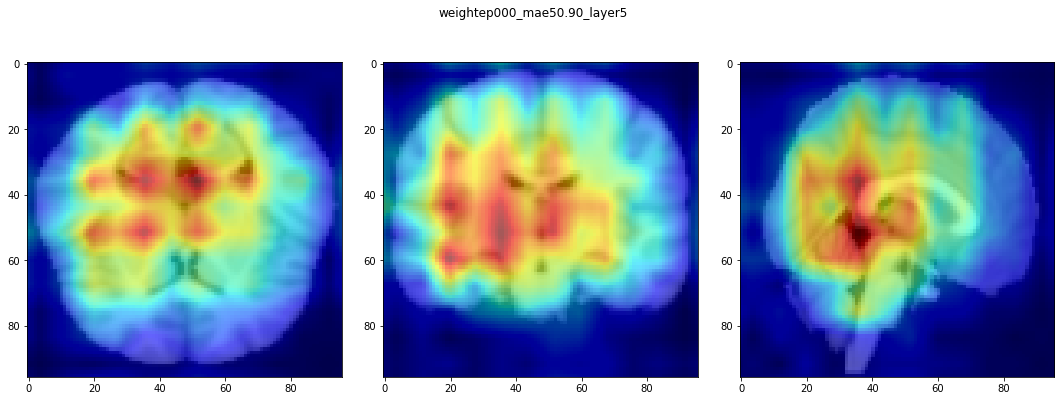

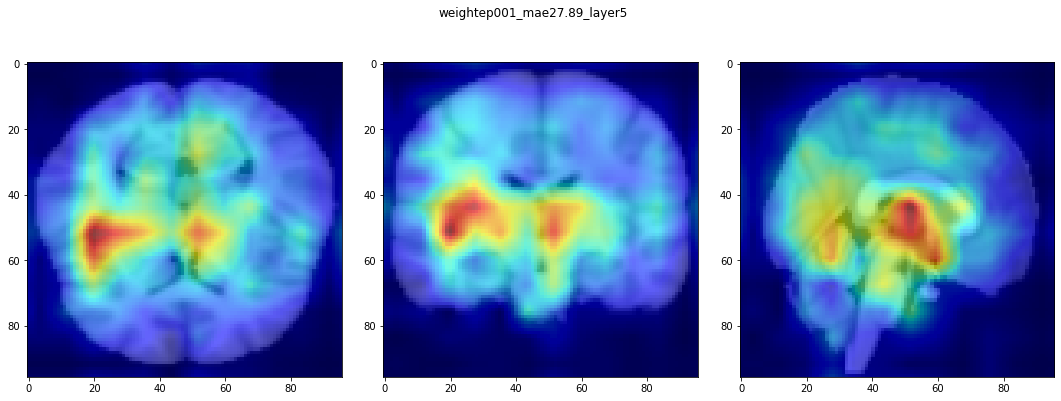

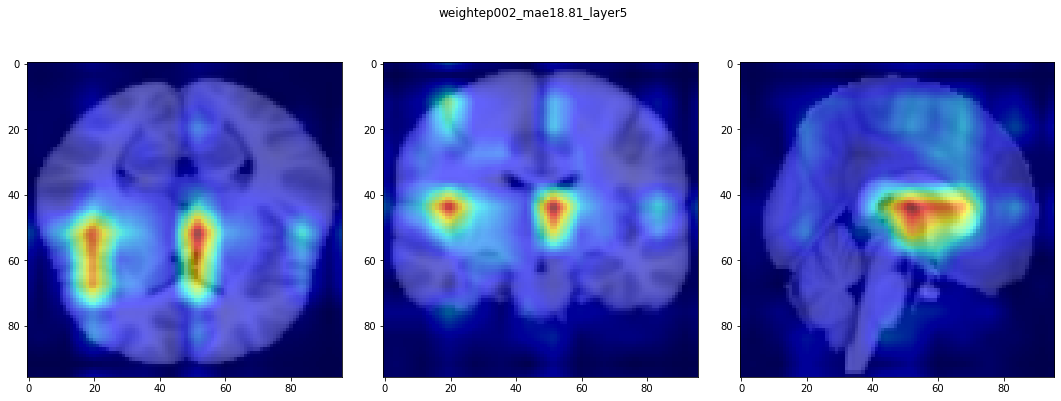

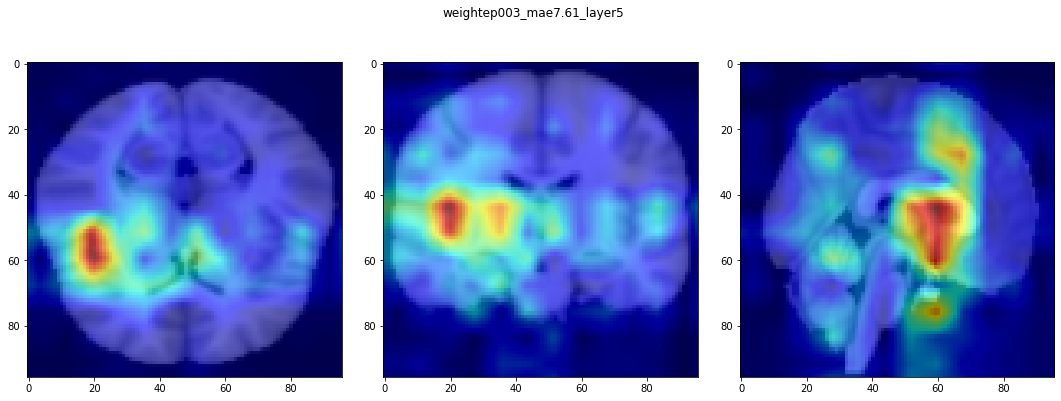

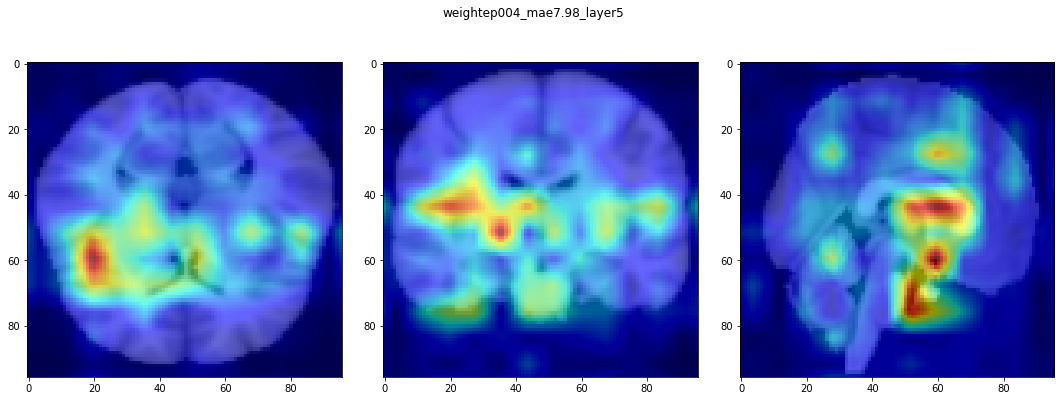

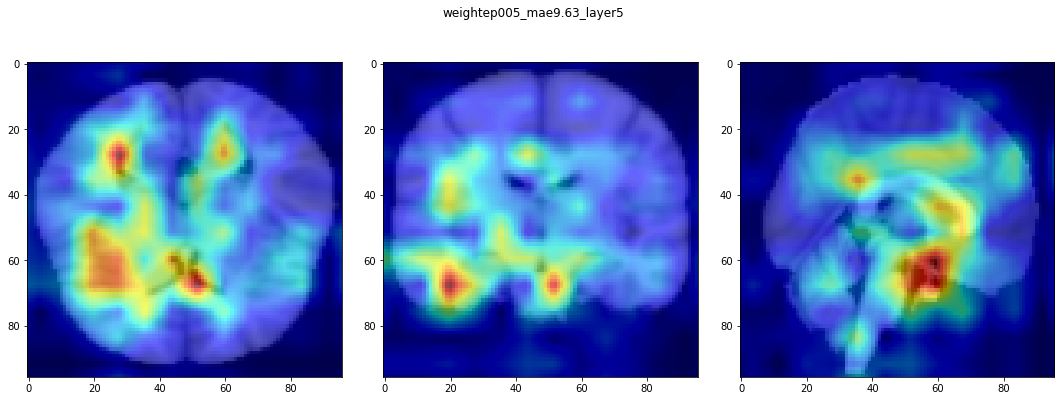

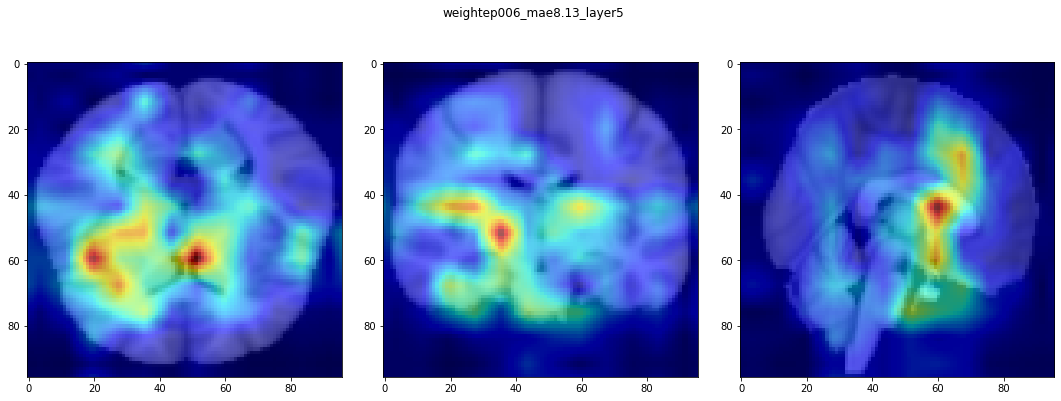

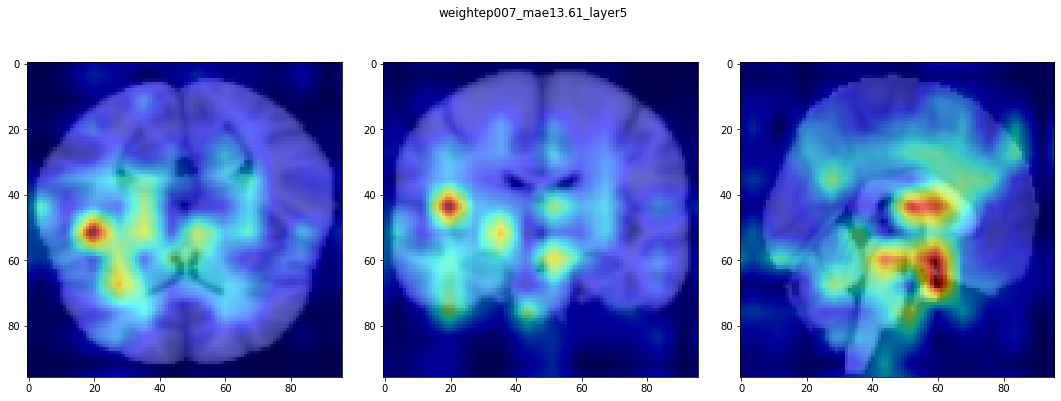

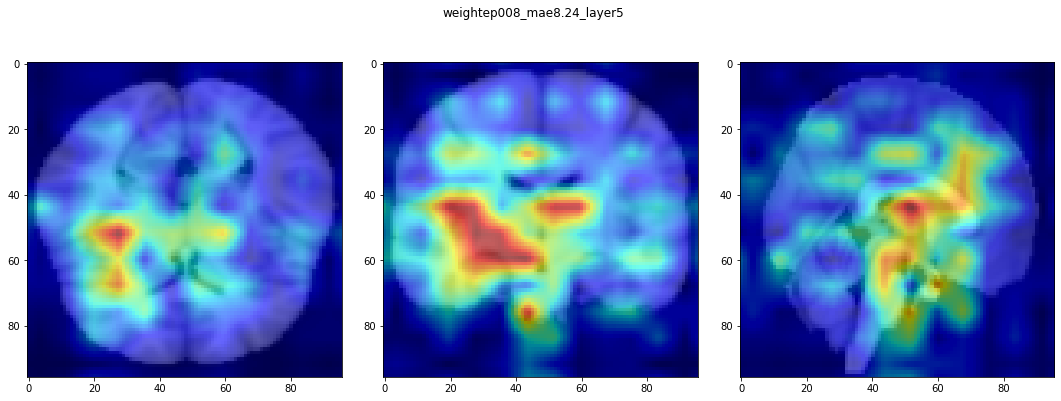

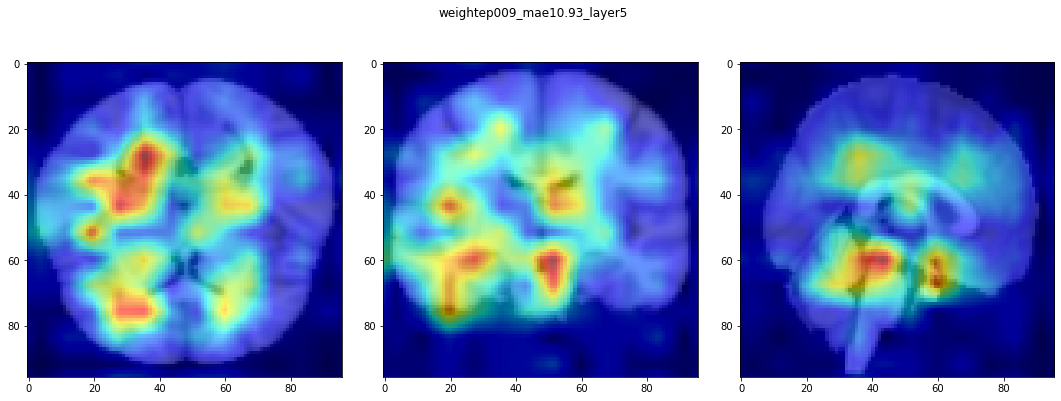

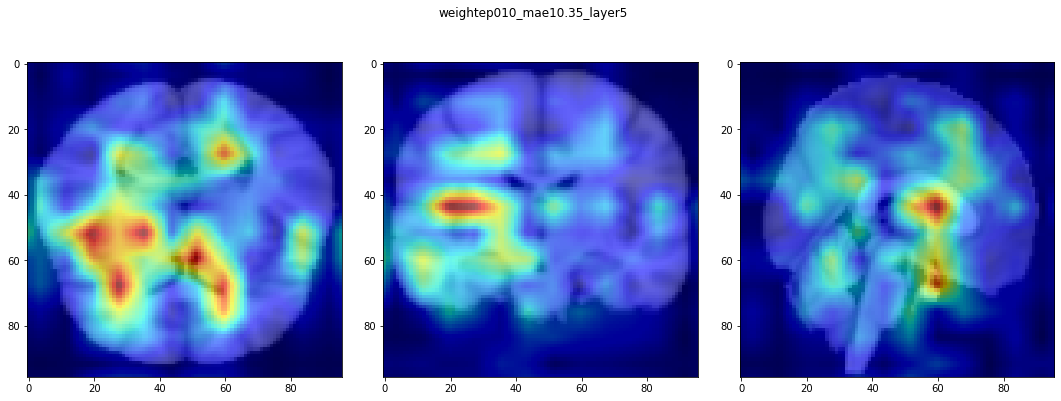

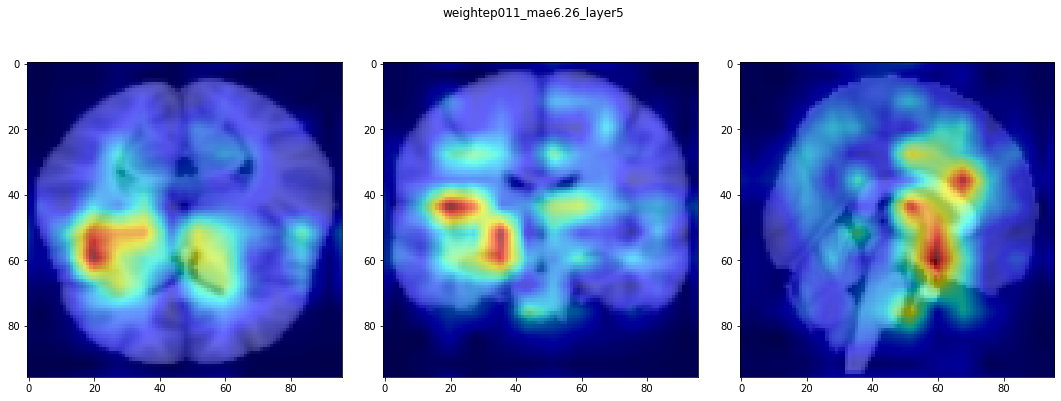

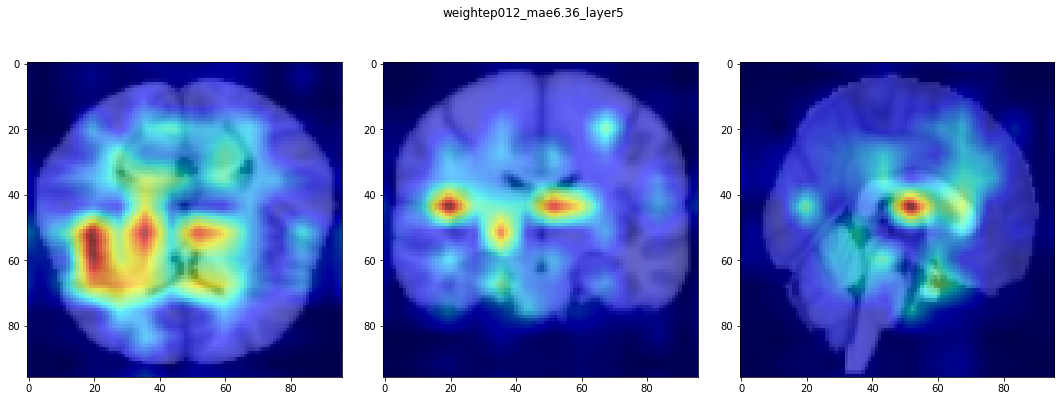

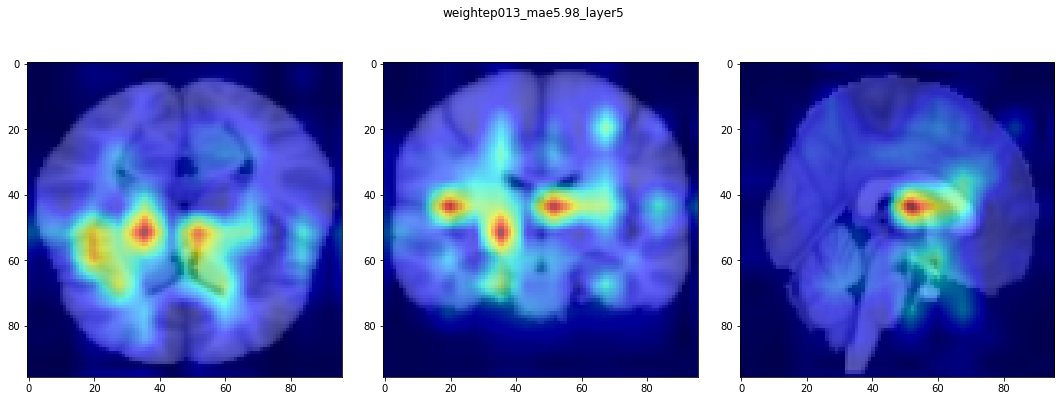

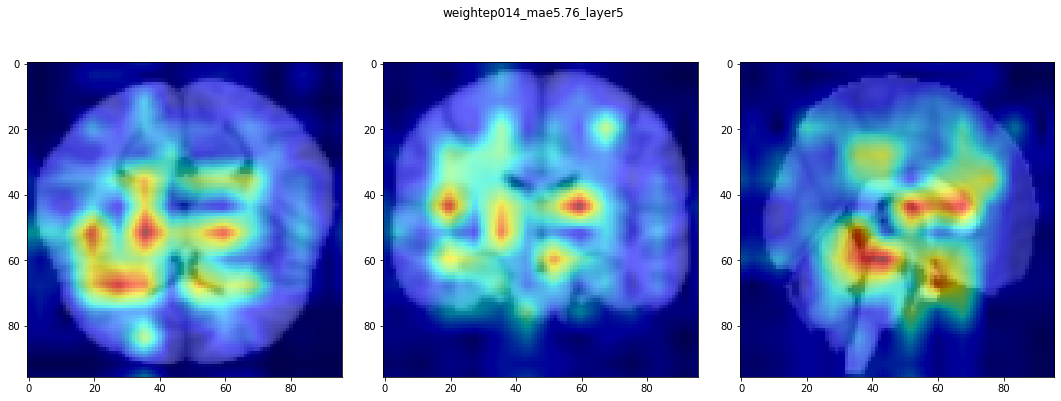

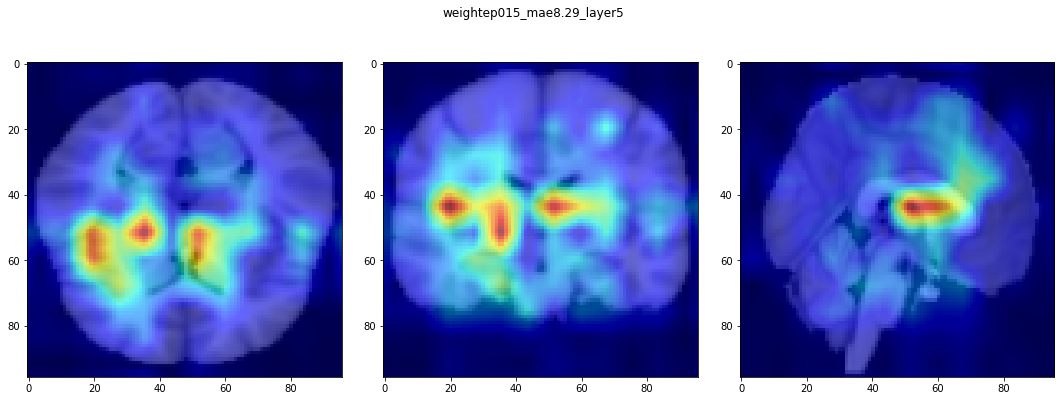

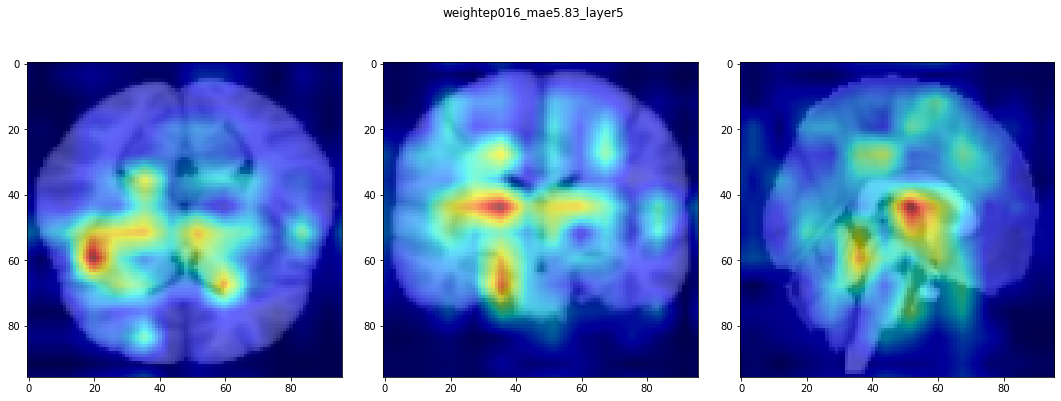

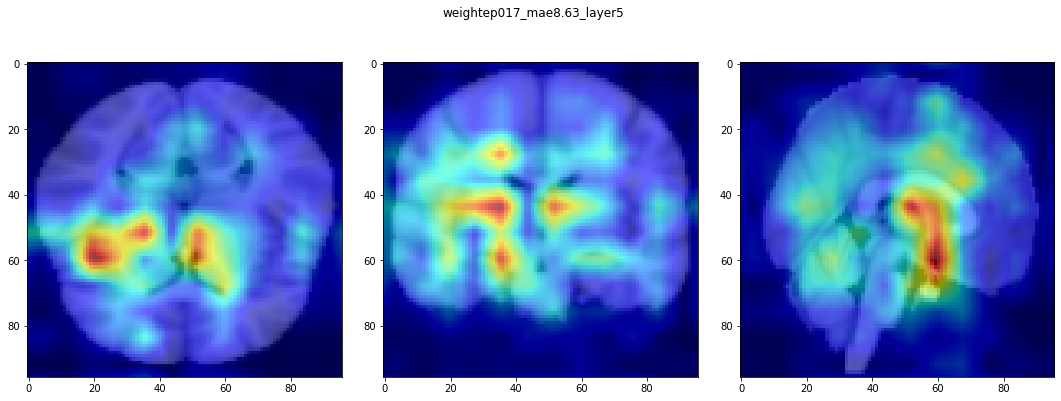

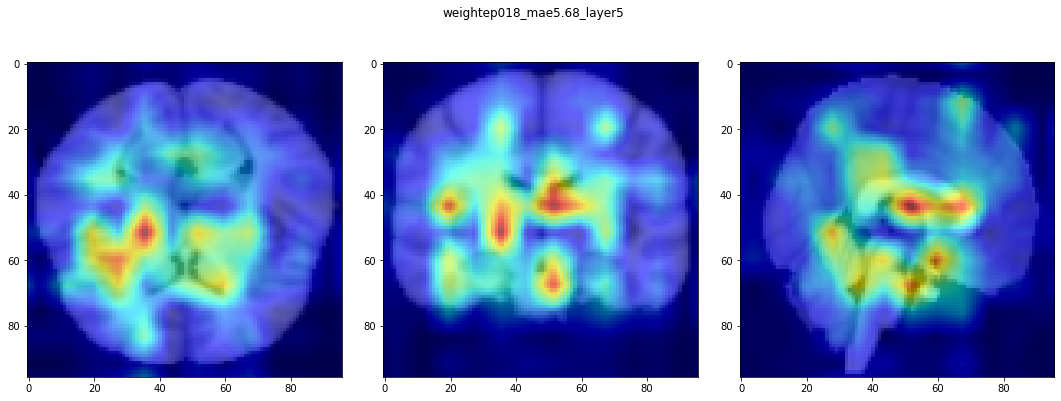

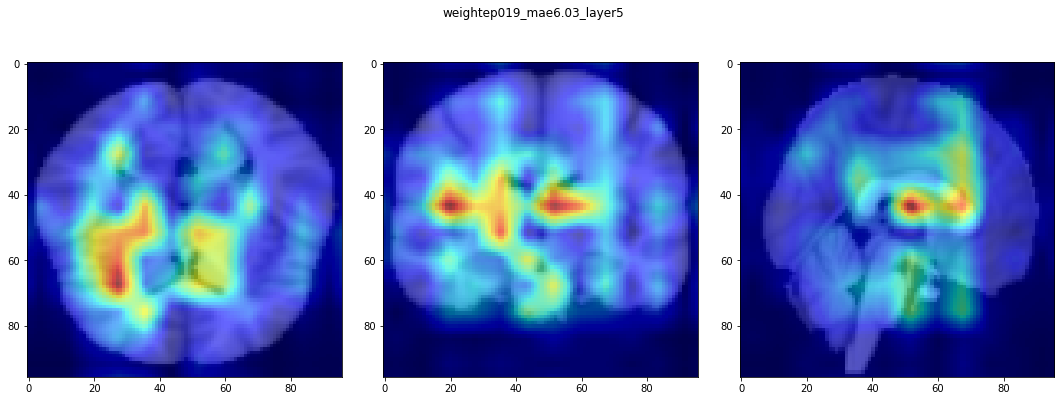

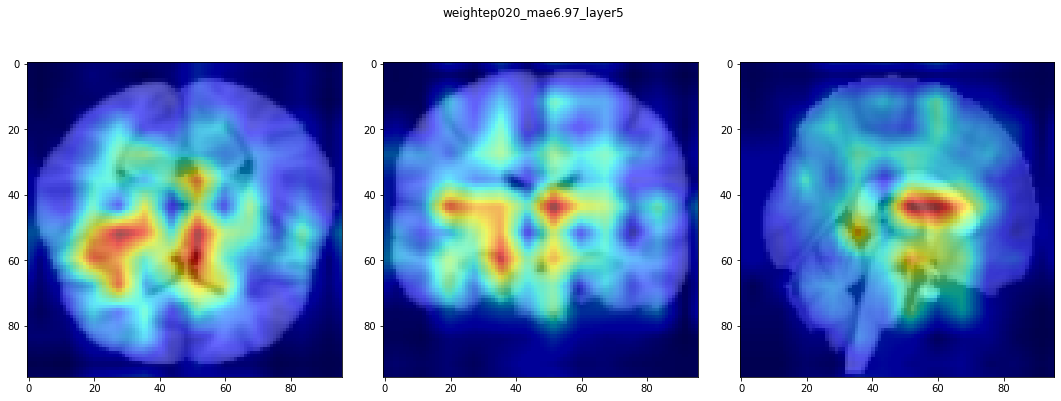

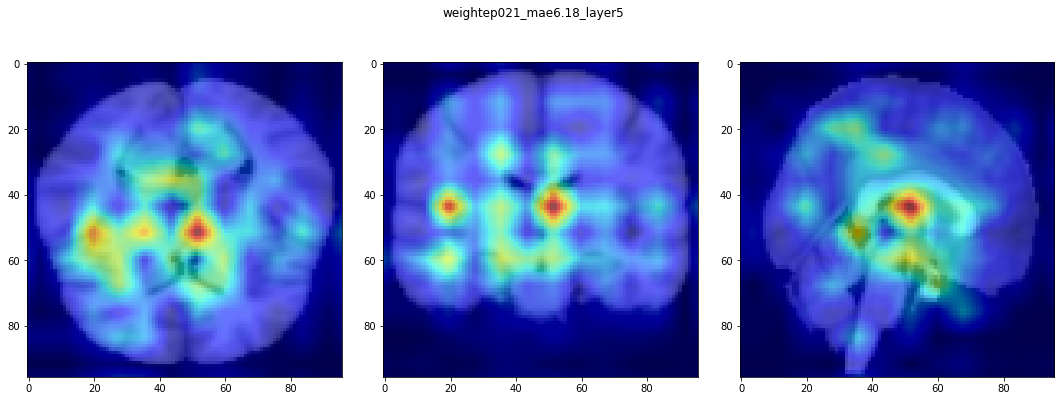

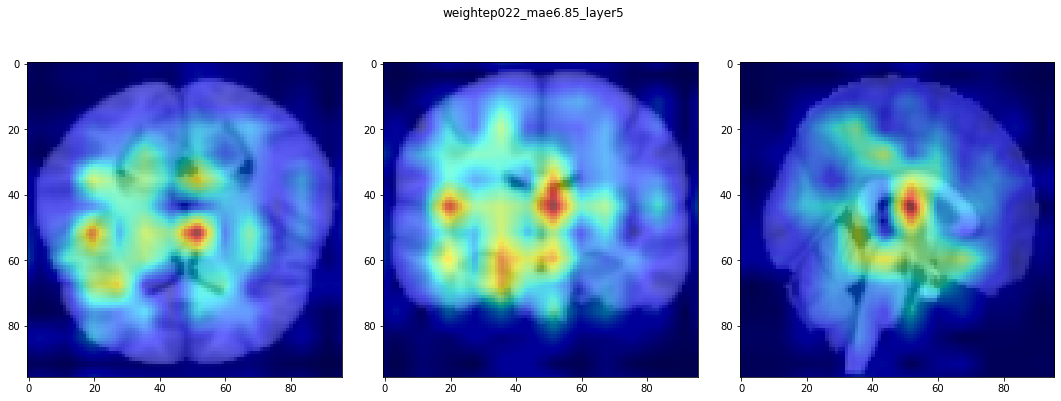

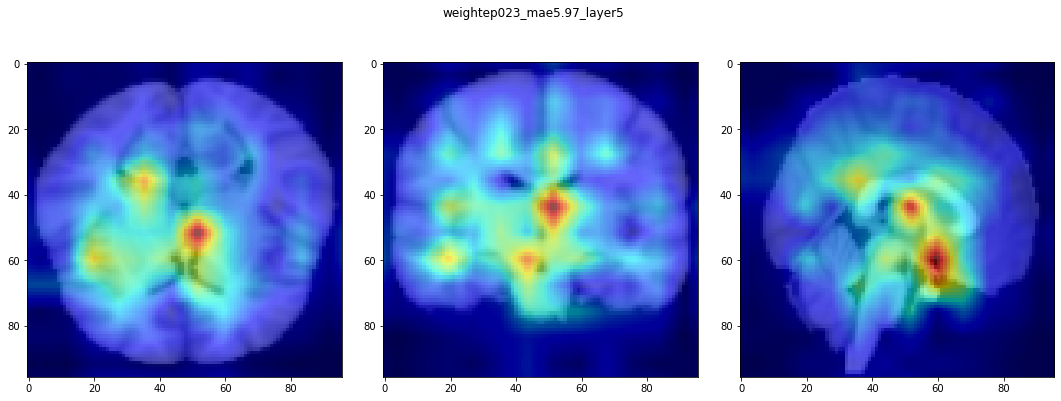

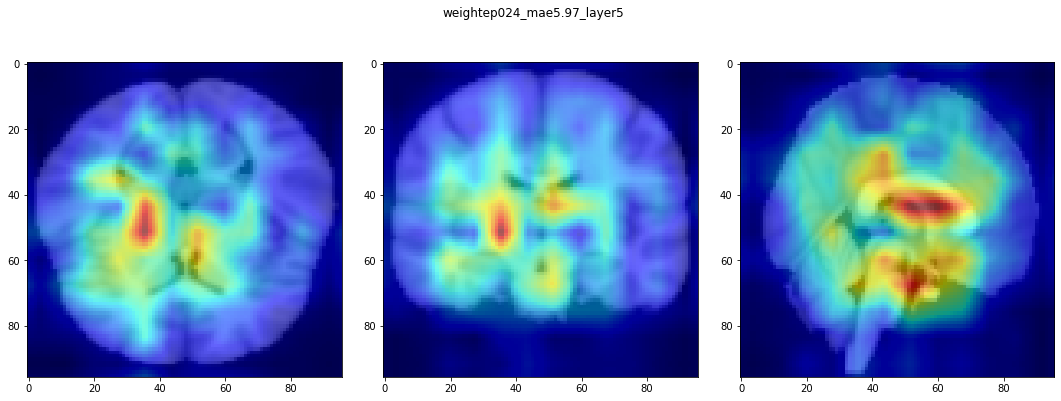

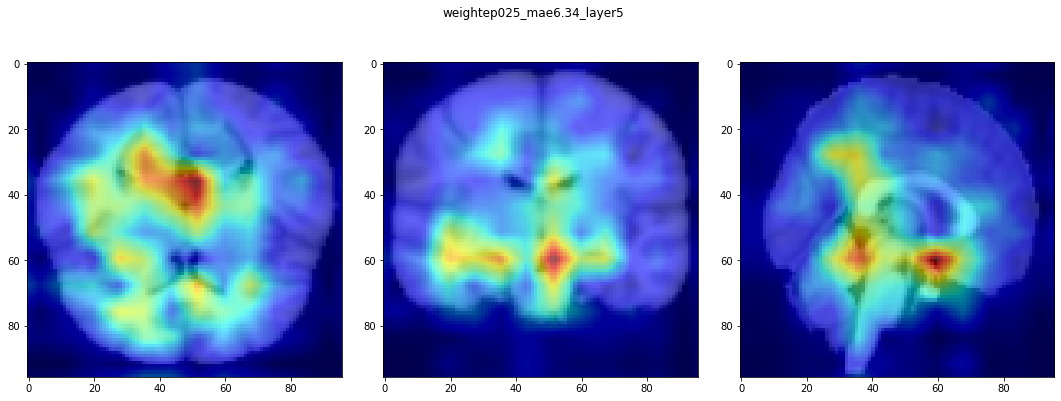

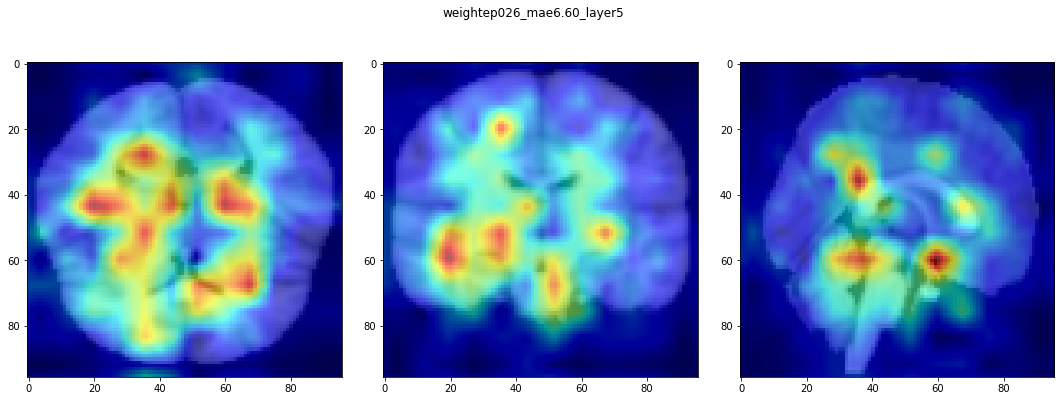

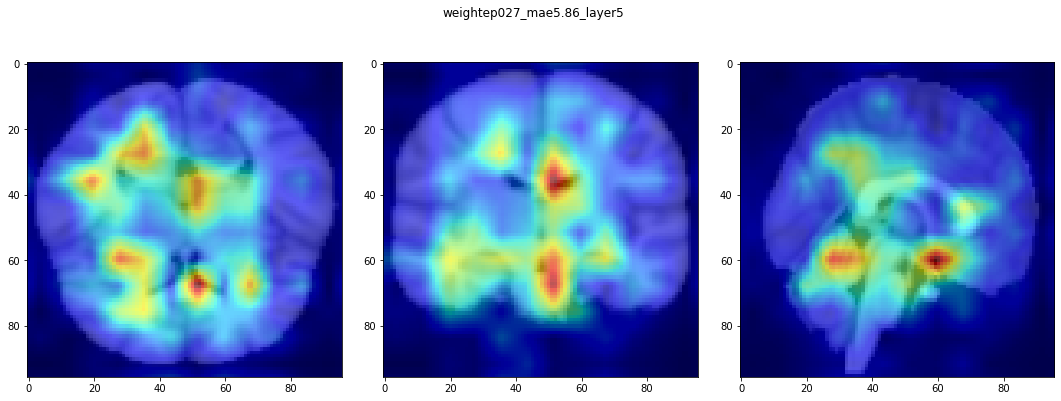

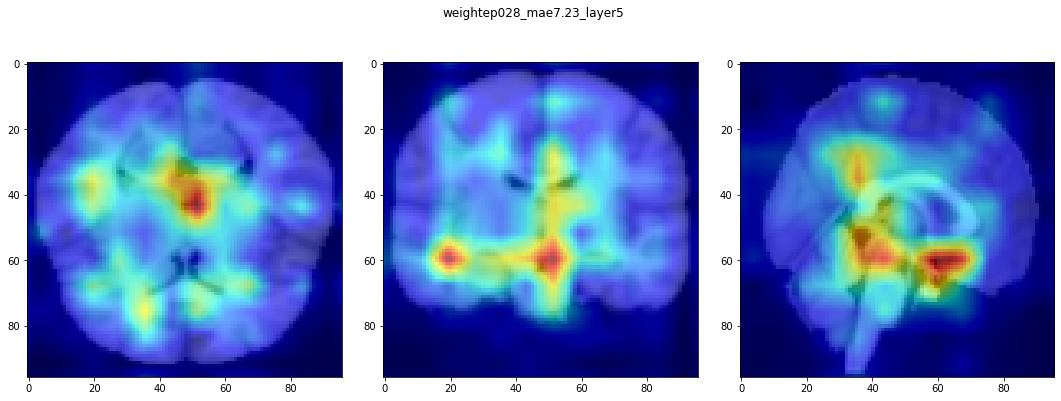

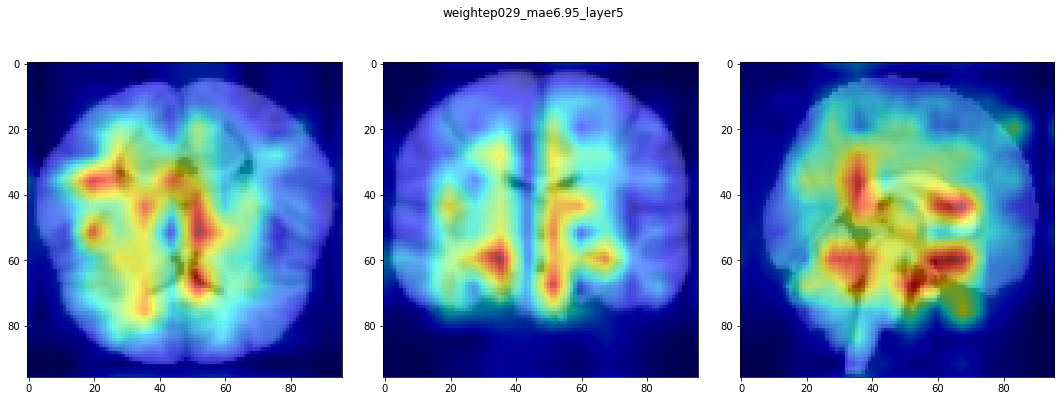

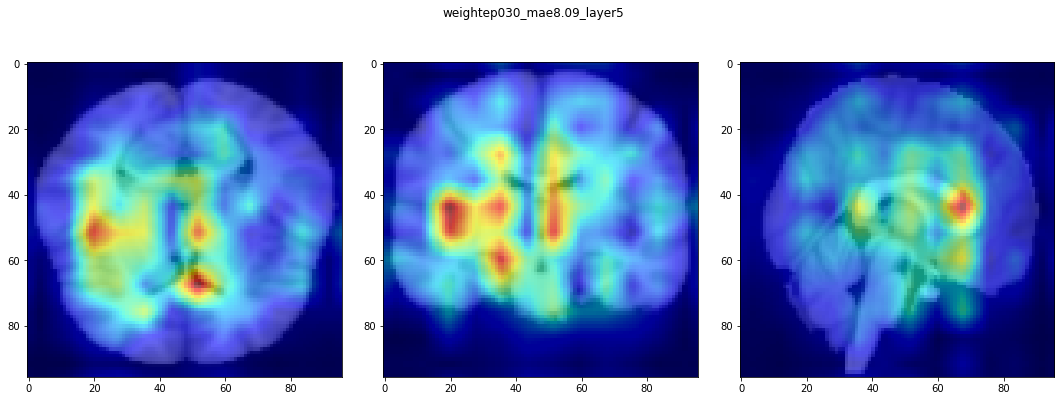

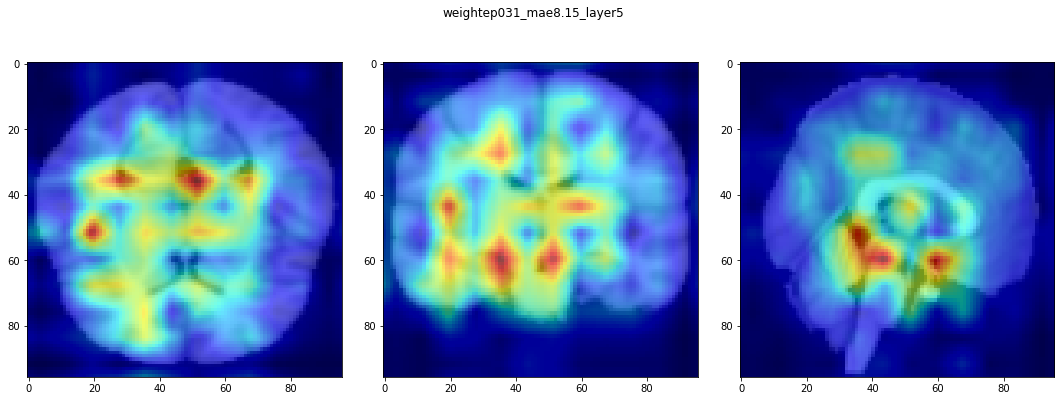

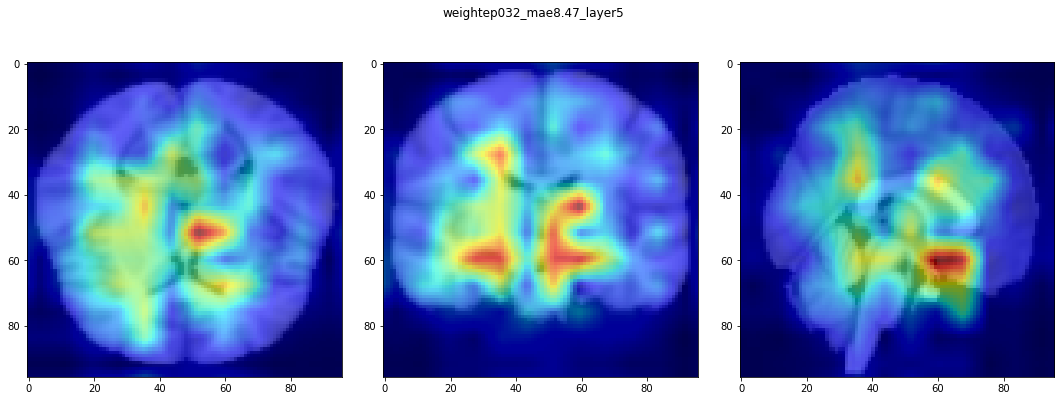

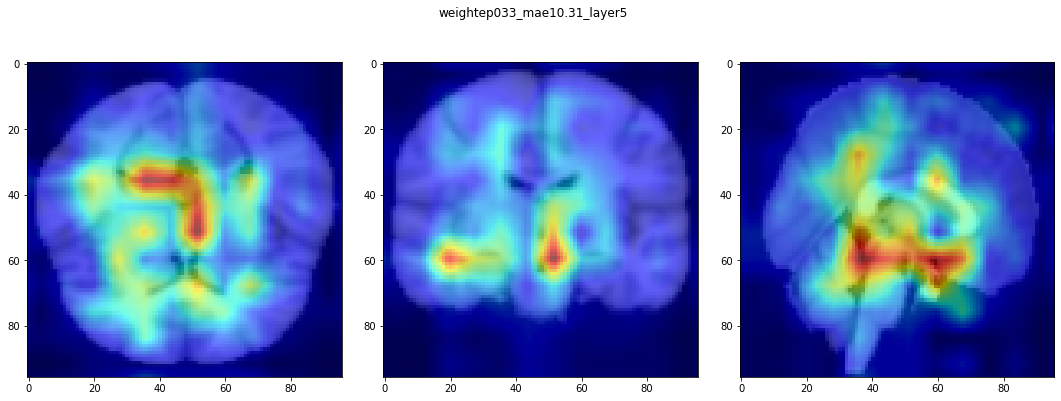

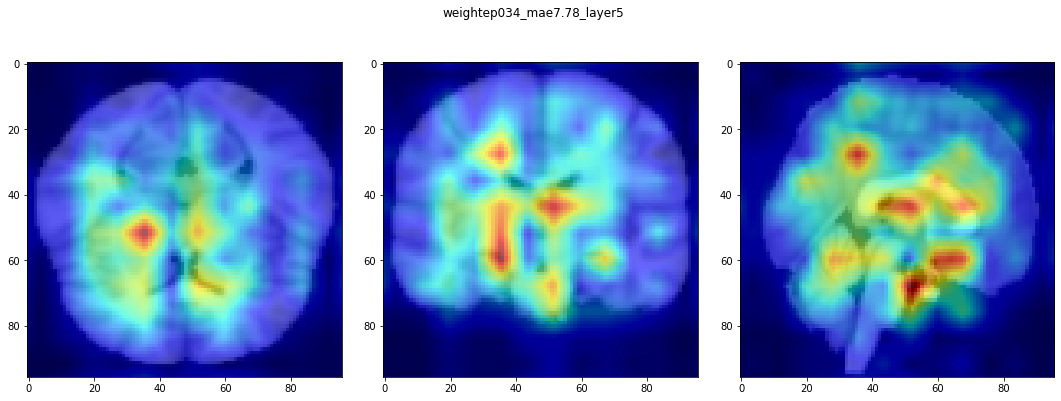

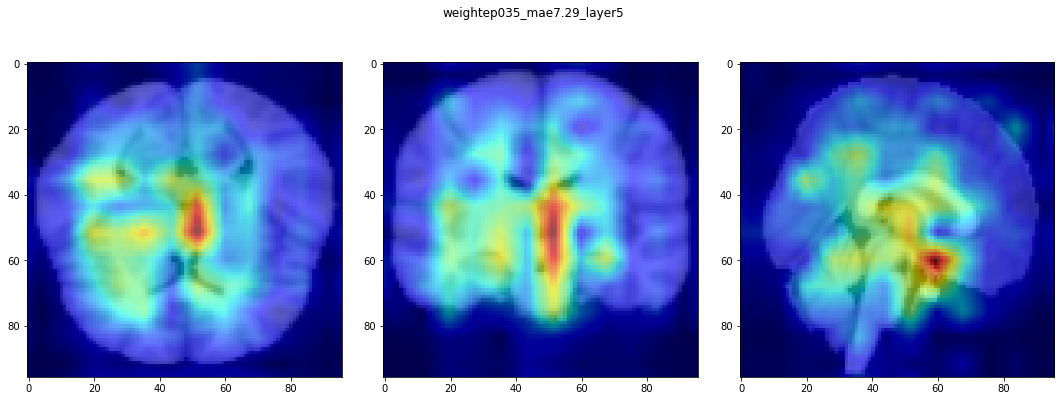

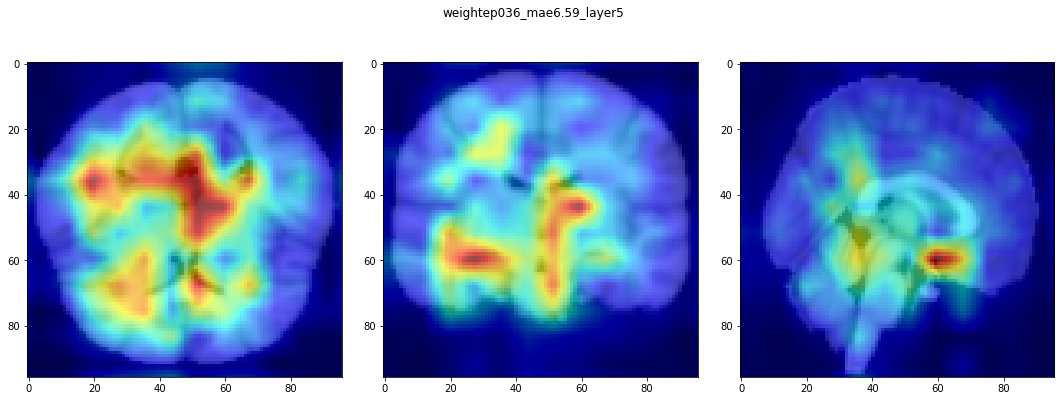

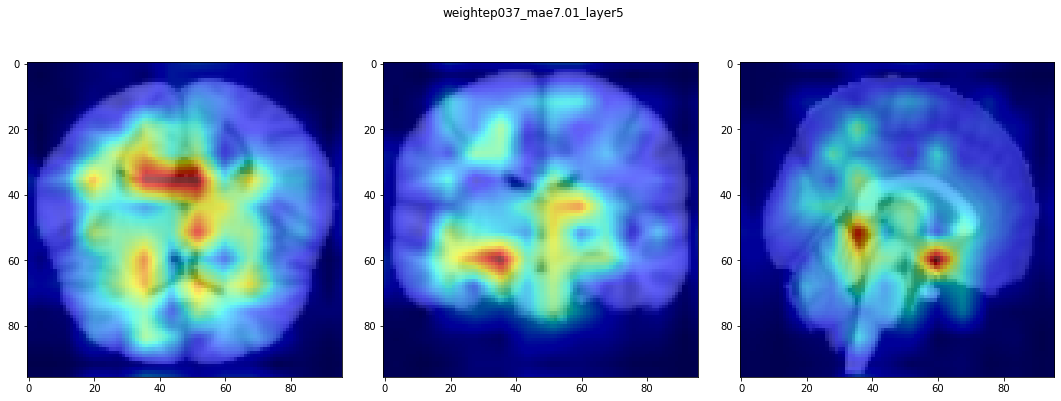

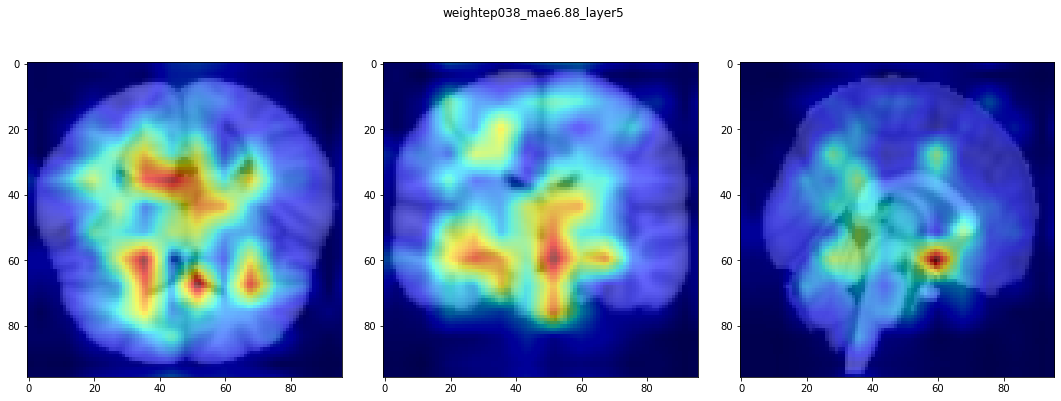

In [3]:
save_gif(PREFIX, layer_idx=5)

## Captum

In [7]:
from captum.attr import IntegratedGradients, GuidedGradCam, LayerGradCam

In [8]:
gcam = VisTool(cfg, model, cam_type='gcam')
gcam.load_weight(weight)

Load '{'encoder': 'G:/My Drive/brain_data/workspace/result/models/20210831-1348_resnet/encoder/ep040_mae5.86.pt', 'regressor': 'G:/My Drive/brain_data/workspace/result/models/20210831-1348_resnet/regressor/ep040_mae5.86.pt', 'config': 'G:/My Drive/brain_data/workspace/result/models/20210831-1348_resnet/config.yml'}'
Weights successfully loaded!
Weights successfully loaded!


In [9]:
model = gcam.model

In [10]:
x, y = map(lambda x: x.to('cuda'), [x, y])

In [11]:
guided_gc = LayerGradCam(model, model.encoder.layer1[0].conv1)
attribution = guided_gc.attribute(x)

In [12]:
vmap = attribution.detach().cpu().data.numpy()

In [13]:
from skimage.transform import resize
resized_vmap = resize(vmap[0][0], output_shape=(96, 96, 96))

C:\Users\pha\anaconda3\envs\cnn\lib\site-packages\matplotlib\image.py:446: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
C:\Users\pha\anaconda3\envs\cnn\lib\site-packages\matplotlib\image.py:453: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
C:\Users\pha\anaconda3\envs\cnn\lib\site-packages\matplotlib\image.py:458: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
C:\Users\pha\anaconda3\envs\cnn\lib\site-packages\matplotlib\image.py:477: UserWarning: Warning: converting a masked element to nan.
  vrange = np.array([self.norm.vmin, self.norm.vmax],


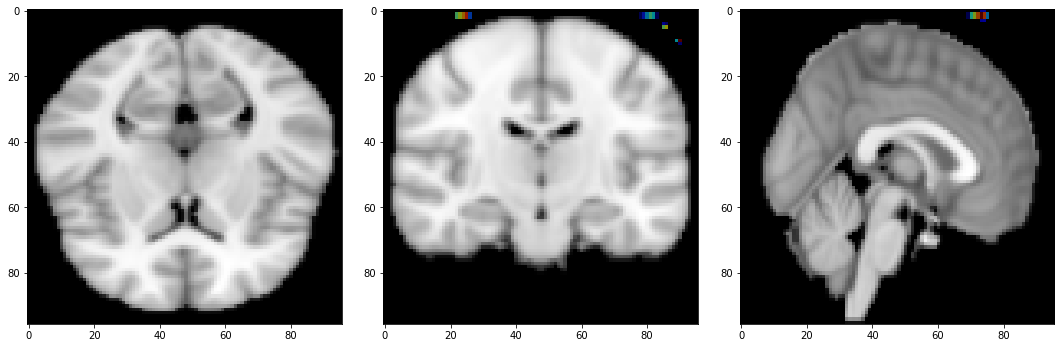

In [16]:
_ = plot_vismap('template', resized_vmap, masked=True)

In [50]:
import pandas as pd
pd.Series(vmap.reshape(-1)).quantile(.97)

3.6827772191827475e-06